# <span style="color: #dc322f; border-bottom: 6px solid  #20603D; font-family:'Bahnschrift Condensed'; font-size:140%; background-color: #fadb8c;"> Online Retail- BoP Clustering</span>

<img src="https://res.cloudinary.com/upwork-cloud/image/upload/c_scale,w_1000/v1685022331/catalog/1661722892270686208/s5fnt55xnirfeyitsbor.jpg" alt="Bank Marketing">

<div style="background-color:#87CEEB; padding:16px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#000080; border-radius:20px 60px;">
    <h2>Notebook Objective 📝</h2>
    <p>The goal of this notebook is to thoroughly explore and analyze the <strong>Online Retail</strong> dataset employing a range of data science methodologies, notably including exploratory data analysis (EDA), preprocessing, and clustering algorithms. Our primary aim is to delve into customer purchase behavior and discern intricate patterns within the dataset. Throughout our journey, we will employ the <strong>Bag of Product method (BoP)</strong> to cluster customers based on their interactions with various products, providing invaluable insights into customer segmentation and preferences. 🛍️ Let's embark on this data-driven exploration together!</p>
</div>


<a id="table of content"></a>
# <span style="color: #3EB489; border-bottom: 6px solid  #20603D; font-family:'Bahnschrift Condensed'; font-size:120%; background-color: #fadb8c;"> Table of Content</span>

<a id="contents_tabel"></a>   

* [1- Importing Libraries 📚](#1)
    
* [2- Loading the Dataset 📊](#2)
    
* [3- Dataset Overview 🔍](#3)
    
* [4- EDA and Preprocessing 🛠️](#4)

    * [4-1- Bag of Product Method🛍️](#5)
    
* [5- Clustering🛒](#6)

    * [5-1- Kmeans🛒](#7)

    * [5-2- DBSCAN🛒](#8)

* [6- Modeling⚡](#9)

     * [6-1- K-Nearest Neighbors🎯](#10)
        
     * [6-2- Support Vector Machine🎯](#11)
        
     * [6-3- XGBoost🎯](#12)
    
     * [6-4- Models Comparision🚀](#13)

* [7- Prediction📊](#14)


<a id='1'></a>
# <span style="color: #3EB489; border-bottom: 6px solid  #20603D; font-family:'Bahnschrift Condensed'; background-color: #fadb8c;"> Importing Libraries📚</span>
⬆️ [Tabel of Contents](#contents_tabel)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

import warnings

<a id='2'></a>
# <span style="color: #3EB489; border-bottom: 6px solid  #20603D; font-family:'Bahnschrift Condensed'; background-color: #fadb8c;"> Loading the Dataset📊</span>
⬆️ [Tabel of Contents](#contents_tabel)

In [2]:
!gdown --id 1y9N1gqB5Q2yrfLdPX_8YXBI-wjxOnhUd

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1y9N1gqB5Q2yrfLdPX_8YXBI-wjxOnhUd
To: /content/Online Retail.xlsx
100% 23.7M/23.7M [00:00<00:00, 59.4MB/s]


In [3]:
Online_Retail = pd.read_excel('Online Retail.xlsx')

<div style="background-color:#87CEEB; padding:16px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#000080; border-radius:20px 60px;">
    <h2>Dataset Information</h2>
    <ul>
        <li>The <strong>Online Retail</strong> dataset contains detailed transaction records from an online retail store. Each entry in the dataset represents a single transaction and includes information such as the <strong>InvoiceNo</strong> (a unique identifier for each transaction), <strong>StockCode</strong> (a unique identifier for each product), <strong>Description</strong> (a description of the product), <strong>Quantity</strong> (the number of items purchased), <strong>InvoiceDate</strong> (the date and time of the transaction), <strong>UnitPrice</strong> (the price per unit of the product), <strong>CustomerID</strong> (a unique identifier for each customer), and <strong>Country</strong> (the country where the transaction took place).</li>
        <li>The dataset contains <strong>541,909</strong> entries. This rich dataset offers a wealth of information for exploring customer behavior, analyzing product popularity, and identifying trends in online retail. Let's dive deeper into this dataset and uncover its hidden insights! 📈💡</li>
    </ul>
    <a href="https://www.kaggle.com/datasets/hellbuoy/online-retail-customer-clustering">Online Retail Dataset</a>
</div>


<a id='3'></a>
# <span style="color: #3EB489; border-bottom: 6px solid  #20603D; font-family:'Bahnschrift Condensed'; background-color: #fadb8c;"> Dataset Overview🔍</span>
⬆️ [Tabel of Contents](#contents_tabel)

In [4]:
data = Online_Retail.copy()
print("Few rows of the dataset:")
data

Few rows of the dataset:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [5]:
print(f'The Shape of Dataset:\nNumber of rows: {data.shape[0]}\nNumber of columns: {data.shape[1]}')

The Shape of Dataset:
Number of rows: 541909
Number of columns: 8


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
print(f'Null values in each column:\n{data.isnull().sum()}')

Null values in each column:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


<a id='4'></a>
# <span style="color: #3EB489; border-bottom: 6px solid  #20603D; font-family:'Bahnschrift Condensed'; background-color: #fadb8c;"> EDA and Preprocessing🛠️</span>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="background-color:#87CEEB; padding:16px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#000080; border-radius:20px 60px;">
    <h2>Handling Missing Values ✂️</h2>
    <p>Since we plan to utilize the Bag of Product (<strong>BoP</strong>) method, which relies on customer interactions identified by <strong>CustomerID</strong>, it's imperative to address any <strong>missing values</strong> in this column. As such, the first preprocessing step involves dropping rows with null values in the <strong>CustomerID</strong> column. This ensures that our analysis is based on complete and meaningful data, enabling us to derive accurate insights and effectively implement the BoP method. Let's trim away those null values and focus on the actionable data! 🧹💼</p>
</div>


In [8]:
# Handling Unknown Values
data = data.dropna(subset=['CustomerID'])

In [9]:
# Duplicated Rows
print(f'The number of duplicated Rows:\n{data.duplicated().sum()}')
duplicated_rows = data[data.duplicated()]

# Drop duplicated rows from the DataFrame
data = data.drop_duplicates()

The number of duplicated Rows:
5225


<div style="background-color:#87CEEB; padding:16px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#000080; border-radius:20px 60px;">
    <h2>Checking Duplicate Values 🔍</h2>
    <p>After handling missing values, the next step is to check for and address any duplicate rows in the dataset. Upon inspection, we found 5,225 redundant rows. To maintain data integrity and ensure accurate analysis, we will filter the dataset to remove these duplicate rows. By doing so, we can streamline our dataset and focus solely on unique and relevant information.🧼🔖</p>
</div>


In [10]:
print(f'Null values in each column:\n{data.isnull().sum()}')

Null values in each column:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [11]:
print(f'The Shape of Dataset after Dropping Null Values and Duplicated Rows:\nNumber of rows: {data.shape[0]}\nNumber of columns: {data.shape[1]}')

The Shape of Dataset after Dropping Null Values and Duplicated Rows:
Number of rows: 401604
Number of columns: 8


In [12]:
print("\nSummary statistics for numerical features:")
column_name = ['Quantity', 'UnitPrice']
data[column_name].describe()


Summary statistics for numerical features:


,Quantity,UnitPrice
count,401604.000000,401604.000000
mean,12.183273,3.474064
std,250.283037,69.764035
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


<div style="background-color:#87CEEB; padding:16px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#000080; border-radius:20px 60px;">
    <h2>Insights from Data Description 📊 </h2>
    <p>Upon examining the <strong>summary statistics</strong> for the <em>Quantity</em> and <em>UnitPrice</em> columns, we unearthed valuable insights that can guide our preprocessing efforts:</p>
    <ol>
        <li><strong>Negative Quantity Values:</strong> The presence of negative values in the Quantity column likely signifies canceled orders or returned products. Since our clustering model is designed to analyze purchasing behavior, we will filter out these negative values to focus exclusively on positive purchase transactions.</li>
        <li><strong>Zero UnitPrice:</strong> Similarly, instances where the UnitPrice is zero may not contribute meaningfully to our clustering analysis. To enhance the quality of our clusters, we will exclude rows with zero UnitPrice values from our dataset.</li>
    </ol>
    <p>By filtering out these non-relevant entries, we can ensure that our clustering model is trained on high-quality data, leading to more accurate and meaningful insights into customer behavior and preferences. Let's refine our dataset and prepare it for clustering! 🛠️📦</p>
</div>


In [13]:
# Identify transactions with negative quantities
negative_quantity_mask = data['Quantity'] < 0
transactions_with_negative_quantity = data[negative_quantity_mask]

# Option 1: Remove transactions with negative quantities
data = data[~negative_quantity_mask]

# Option 2: Convert negative quantities to positive
# data.loc[negative_quantity_mask, 'Quantity'] = data.loc[negative_quantity_mask, 'Quantity'].abs()
# =====================================================================================================
# Identify transactions with zero UnitPrice
zero_price_mask = data['UnitPrice'] <= 0
transactions_with_zero_price = data[zero_price_mask]

# Remove transactions with zero UnitPrice
data = data[~zero_price_mask]

In [14]:
print("\nSummary statistics for numerical features after dropping negative Quantity:")
column_name = ['Quantity', 'UnitPrice']
data[column_name].describe()


Summary statistics for numerical features after dropping negative Quantity:


,Quantity,UnitPrice
count,392692.000000,392692.000000
mean,13.119702,3.125914
std,180.492832,22.241836
min,1.000000,0.001000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,8142.750000


<div style="background-color:#87CEEB; padding:16px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#000080; border-radius:20px 60px;">
    <h2>Handling Outliers in Quantity Column 📈 </h2>
    <p>To ensure robust clustering results using the Bag of Product (BoP) method, it's crucial to address <strong>outliers</strong> in the <strong>Quantity</strong> column. We'll employ the <em>Interquartile Range (IQR)</em> technique to identify and filter out entries with values that fall below the <em>lower-bound</em> or above the <em>upper-bound</em> thresholds. By doing so, we can mitigate the influence of extreme values and improve the quality of our clustering analysis. Let's leverage the IQR technique to refine our dataset and prepare it for more effective clustering! 📊🔍</p>
</div>


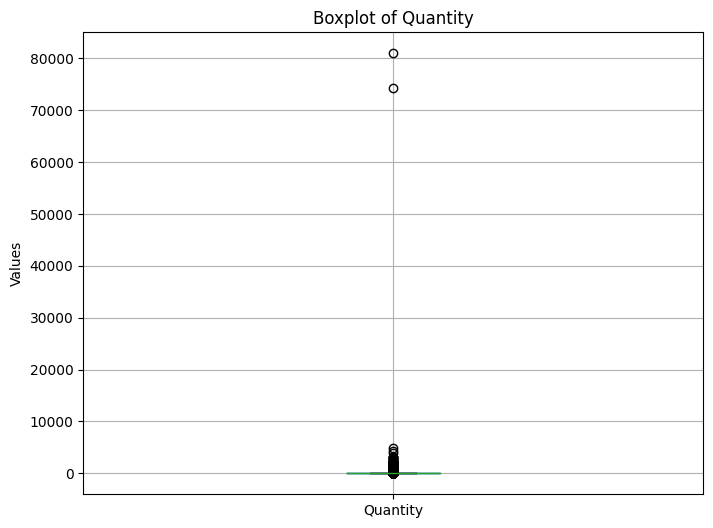

In [15]:
# Create a boxplot of the Quantity column
plt.figure(figsize=(8, 6))
data.boxplot('Quantity')
plt.title('Boxplot of Quantity')
plt.ylabel('Values')
plt.show()

In [16]:
# outlier data
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [17]:
# outlier data
outlier_detection = data['Quantity']
outliers = find_outliers_IQR(data['Quantity'])
perc = len(find_outliers_IQR(data['Quantity'])) * 100.0 / np.shape(outlier_detection)[0]
print('Outliers in Quantity Column:\n')
print(f"Number of Outliers = {len(outliers)}","||",f"Max Outlier Value = {outliers.max()}",
      "||", f"Min Outlier Value = {outliers.min()}", "||", f"Percentage of Outliers = {perc:.2f}%")

Outliers in Quantity Column:

Number of Outliers = 25616 || Max Outlier Value = 80995 || Min Outlier Value = 28 || Percentage of Outliers = 6.52%


In [18]:
column_name = 'Quantity'

# Calculate the first quartile (Q1)
Q1 = data[column_name].quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = data[column_name].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers from the DataFrame
data = data[(data[column_name] >= lower_bound) & (data[column_name] <= upper_bound)]

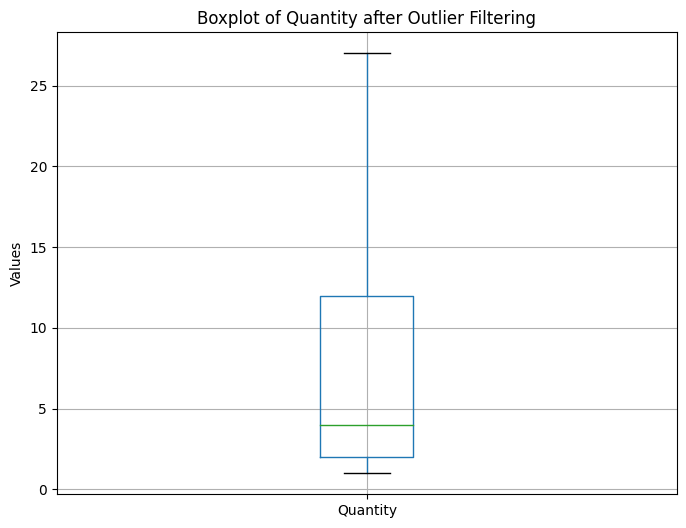

In [19]:
# Create a boxplot of the Quantity column
plt.figure(figsize=(8, 6))
data.boxplot('Quantity')
plt.title('Boxplot of Quantity after Outlier Filtering')
plt.ylabel('Values')
plt.show()

In [20]:
print(f'The Shape of Dataset after Dropping Outliers :\nNumber of rows: {data.shape[0]}\nNumber of columns: {data.shape[1]}')

The Shape of Dataset after Dropping Outliers :
Number of rows: 367076
Number of columns: 8


In [21]:
print("\nSummary statistics for categorical features:")
data.describe(include='O')


Summary statistics for categorical features:


,InvoiceNo,StockCode,Description,Country
count,367076,367076,367076,367076
unique,17312,3647,3853,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,535,1674,1668,328985


In [22]:
print('The unique values in CustomerID:\n',data['CustomerID'].nunique())

The unique values in CustomerID:
 4238


<div style="background-color:#87CEEB; padding:16px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#000080; border-radius:20px 60px;">
    <h2>Insights from Categorical Columns</h2>
    <p>Analyzing the unique values in the categorical columns provides valuable insights into the dimensions of our dataset:</p>
    <ol>
        <li><strong>StockCode Diversity:</strong> With 3,647 unique values for StockCode, our dataset exhibits a wide variety of products.</li>
        <li><strong>CustomerID Variability:</strong> Similarly, there are 4,238 unique values for CustomerID, indicating a diverse customer base.</li>
    </ol>
    <p>Considering these facts, it's evident that employing the Bag of Product (BoP) method will result in a <strong>high-dimensional dataset</strong> with 4,238 rows (corresponding to customers) and 3,647 columns (representing unique products). This presents a <strong>significant challenge</strong> due to the <em>large dimensionality</em> and <em>sparsity</em> of the data, which can hinder the effectiveness of clustering algorithms.</p>
    <p>In the next step, we must address this challenge by implementing techniques to reduce dimensionality and mitigate sparsity, thereby enhancing the performance of our clustering method. 📉🔍</p>
</div>


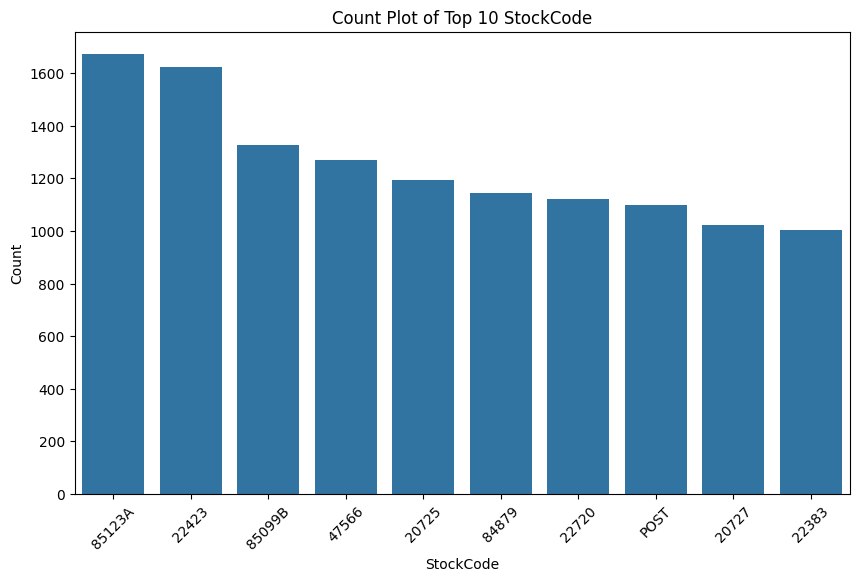

In [23]:
# count plot
column_name = 'StockCode'

# Get the top 10 unique values and their counts
top_10_values = data[column_name].value_counts().head(10)

# Create a DataFrame from the top 10 unique values and their counts
top_10_df = pd.DataFrame({column_name: top_10_values.index, 'count': top_10_values.values})

# Plot the count plot
plt.figure(figsize=(10, 6))
sns.barplot(x=column_name, y='count', data=top_10_df)
plt.title('Count Plot of Top 10 ' + column_name)
plt.xlabel(column_name)
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

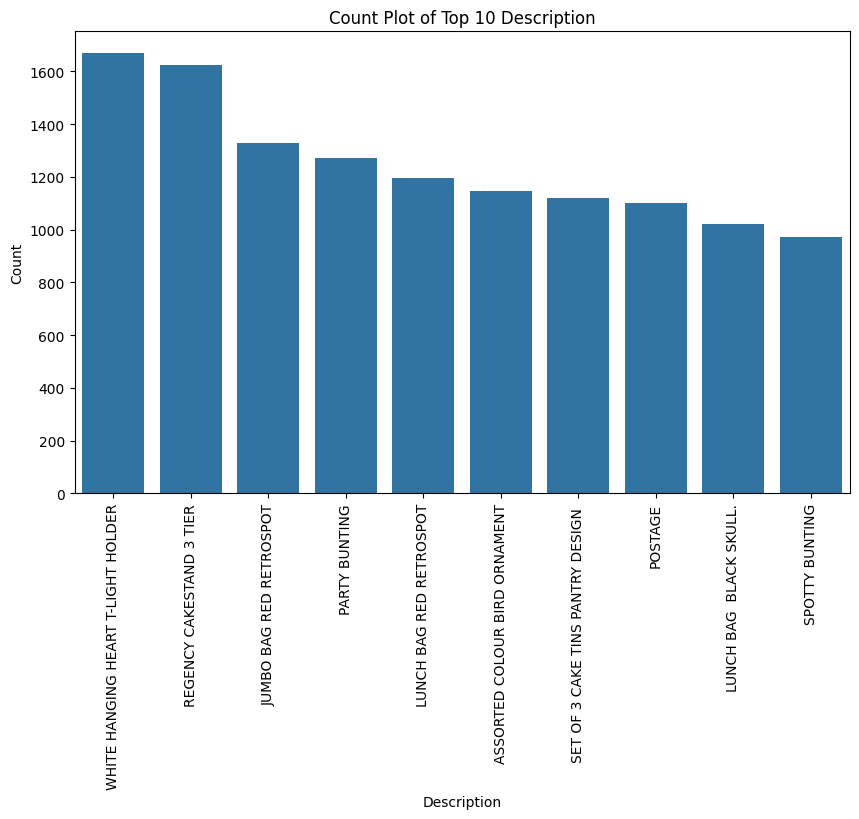

In [24]:
# count plot
column_name = 'Description'

# Get the top 10 unique values and their counts
top_10_values = data[column_name].value_counts().head(10)

# Create a DataFrame from the top 10 unique values and their counts
top_10_df = pd.DataFrame({column_name: top_10_values.index, 'count': top_10_values.values})

# Plot the count plot
plt.figure(figsize=(10, 6))
sns.barplot(x=column_name, y='count', data=top_10_df)
plt.title('Count Plot of Top 10 ' + column_name)
plt.xlabel(column_name)
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

<div style="background-color:#87CEEB; padding:16px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#000080; border-radius:20px 60px;">
    <h2>Top Frequent Products</h2>
    <p>Visualizing the frequency of <strong>StockCode</strong> and <strong>Description</strong> provides insights into the most popular products among customers:</p>
    <ol>
        <li>Top StockCode: <strong>'85123A'</strong></li>
        <li>Top Description: <strong>'White Hanging Heart T-Light Holder'</strong></li>
    </ol>
    <p>These findings suggest that the product with StockCode <strong>'85123A'</strong> and Description <strong>'White Hanging Heart T-Light Holder'</strong> are highly favored by customers, indicating their popularity and potential significance in our analysis. It's worth noting that while <strong>'StockCode'</strong> represents a unique identifier for each product, the <strong>'Description'</strong> column contains a larger number of unique values. This observation suggests that multiple descriptions may correspond to a single code.</p>
    <p>Understanding customer preferences for these top products can inform targeted marketing strategies or product recommendations, enhancing customer satisfaction and driving business growth. 📊🛍️</p>
</div>

<a id='5'></a>
# <span style="color: #3EB489; border-bottom: 6px solid  #20603D; font-family:'Bahnschrift Condensed'; background-color: #fadb8c;"> Bag of Product Method🛍️</span>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="background-color:#87CEEB; padding:16px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#000080; border-radius:20px 60px;">
    <h2>Optimizing Bag of Products (BoP) Method</h2>
    <p>In the preceding section, we highlighted <em>a significant challenge</em> associated with utilizing the <strong>Bag of Products (BoP)</strong> method: the dataset's <strong>high dimensionality and sparsity</strong>, stemming from the multitude of StockCode entries per CustomerID. To address this challenge and enhance the efficacy of our clustering approach, I undertook a systematic exploration to determine the optimal number of top frequent products (N) to include in our analysis. After experimenting with various N values, I found that setting N to <strong>10</strong> yielded the best results for our model.</p>
    <p>The subsequent code snippet illustrates how we implemented this strategy: first, we filtered the primary dataset to retain only the top 10 most frequently purchased products. Then, leveraging <strong>group-by and pivot-table</strong> operations on 'CustomerID', 'StockCode', and 'Quantity', we constructed the BoP dataset. This process effectively reduces the dimensionality of the dataset while preserving the most relevant information, laying the groundwork for more robust clustering outcomes. 🛠️📦</p>
</div>

In [25]:
# Step 1: Count the frequency of occurrence of each StockCode
stockcode_counts = data['StockCode'].value_counts()

# Step 2: Select the top N most repetitive StockCode values
top_stockcodes = stockcode_counts.head(10).index

# Step 3: Filter the dataset to include only rows corresponding to the selected StockCode values
data = data[data['StockCode'].isin(top_stockcodes)]

In [26]:
print(f'The Shape of Dataset after Considering top 10 StockCode:\nNumber of rows: {data.shape[0]}\nNumber of columns: {data.shape[1]}')

The Shape of Dataset after Considering top 10 StockCode:
Number of rows: 12480
Number of columns: 8


In [27]:
print("\nSummary statistics for categorical features:")
data.describe(include='O')


Summary statistics for categorical features:


,InvoiceNo,StockCode,Description,Country
count,12480,12480,12480,12480
unique,7657,10,12,35
top,569332,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,8,1674,1668,10449


In [28]:
# Group by CustomerID and StockCode, then aggregate Quantity
customer_product_df = data.groupby(['CustomerID', 'StockCode']).agg({'Quantity': 'sum'}).reset_index()

# Pivot the table to convert it into the bag of products format
bag_of_products_df = customer_product_df.pivot(index='CustomerID', columns='StockCode', values='Quantity').fillna(0)

# Fill missing values with 0 (indicating the customer did not purchase that product)
bag_of_products_df.fillna(0, inplace=True)

# Reset index to make CustomerID a regular column
bag_of_products_df.reset_index(inplace=True)

In [29]:
# Set CustomerID as index
BoP_data = bag_of_products_df.set_index('CustomerID')

In [30]:
BoP_data.head()

StockCode,20725,20727,22383,22423,22720,47566,84879,85099B,85123A,POST
CustomerID,,,,,,,,,,
12347.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0
12348.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
12349.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0
12350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12352.0,0.0,0.0,0.0,5.0,6.0,0.0,0.0,0.0,0.0,7.0


<div style="background-color:#87CEEB; padding:16px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#000080; border-radius:20px 60px;">
    <h2>Bag of Products (BoP) Dataset Overview</h2>
    <p>The dataframe above showcases the implementation of the Bag of Products (BoP) method, providing insights into the top 10 StockCodes associated with each CustomerID. By aggregating customer purchase data and prioritizing the most frequently purchased products, we've distilled the dataset to capture the primary preferences of each customer.</p>
    <p>This BoP dataset serves as a compact representation of customer purchasing behavior, offering a concise yet informative snapshot of product interactions.</p>
    <p>Let's harness the power of this BoP dataset to unlock actionable insights and drive impactful decision-making in our analysis! 🛍️🔍</p>
</div>

In [31]:
print(f'The Shape of Bag of Product Data:\nNumber of rows: {BoP_data.shape[0]}\nNumber of columns: {BoP_data.shape[1]}')

The Shape of Bag of Product Data:
Number of rows: 2645
Number of columns: 10


<a id='6'></a>
# <span style="color: #3EB489; border-bottom: 6px solid  #20603D; font-family:'Bahnschrift Condensed'; background-color: #fadb8c;"> Clustering🛒</span>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="background-color:#87CEEB; padding:16px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#000080; border-radius:20px 60px;">
    <h2>Transforming BoP Dataset</h2>
    <p>To facilitate customer segmentation based on product purchasing behavior, I propose a transformation of the BoP dataset. This transformation involves converting any quantity of product purchasing to 1 and non-buying instances to 0. By standardizing the representation of product interactions across customers, we can simplify the clustering process and enable different algorithms to discern patterns in customer purchasing behavior effectively.</p>
    <p>This straightforward conversion ensures that our clustering algorithms focus solely on the presence or absence of product purchases, rather than the quantity of purchases. Let's apply this transformation to the BoP dataset and pave the way for more intuitive customer segmentation! 🔄📊</p>
</div>


In [32]:
# Convert quantities to binary representation (1 if purchased, 0 otherwise) #Normalizing
bag_of_products_df[bag_of_products_df > 0] = 1
BoP_data = bag_of_products_df.set_index('CustomerID')

In [33]:
X = BoP_data.values

In [34]:
def plot_value_counts_with_annotation(arr):
    """
    Plot a barplot for a numpy array with annotations for each bar.

    Parameters:
        arr (numpy.ndarray): The numpy array to analyze and plot.
    """
    # Calculate the unique values and their counts
    unique_values, value_counts = np.unique(arr, return_counts=True)

    # Plot the barplot with annotations
    plt.figure(figsize=(7, 4))  # Adjust the figure size if needed
    ax = plt.bar(unique_values, value_counts, color='skyblue')
    plt.title('Barplot of Cluster Labels')
    plt.xlabel('Lables')
    plt.ylabel('Count')

    # Annotate each bar with its count
    for i, count in enumerate(value_counts):
        plt.text(unique_values[i], count + 0.1, str(count), ha='center', va='bottom')

    # plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()


In [35]:
def calculate_silhouette_and_inertia(data, labels, model):
    """
    Calculate Silhouette score and inertia for a clustering model.

    Args:
    - data (DataFrame): DataFrame containing the data.
    - labels (array-like): Array containing the cluster labels.
    - model: Fitted clustering model.

    Returns:
    - silhouette_score: Silhouette score for the clustering model.
    - inertia: Inertia (within-cluster sum of squares) for the clustering model.
    """
    # Calculate Silhouette score
    silhouette = silhouette_score(data, labels)

    # Calculate inertia
    inertia = model.inertia_

    return silhouette, inertia

<a id='7'></a>
# <span style="color: #3EB489; border-bottom: 6px solid  #20603D; font-family:'Bahnschrift Condensed'; background-color: #fadb8c;"> Kmeans🛒</span>
⬆️ [Tabel of Contents](#contents_tabel)

In [36]:
def kmeans_elbow_silhouette(data, max_clusters):
    """
    Perform K-means clustering and plot the elbow chart and silhouette score for each k.

    Args:
    - data (DataFrame): DataFrame containing the data.
    - max_clusters (int): Maximum number of clusters to consider.
    """

    # Initialize lists to store the distortion and silhouette scores
    distortions = []
    silhouette_scores = []

    # Iterate over a range of k values
    for k in range(2, max_clusters + 1):
        # Fit K-means clustering on the data
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)

        # Calculate distortion (inertia) and silhouette score
        distortions.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(data, kmeans.labels_))

    # Plot the elbow chart and silhouette scores for each k
    fig, ax1 = plt.subplots(figsize=(7, 4))

    color = 'tab:blue'
    ax1.set_xlabel('Number of Clusters (k)')
    ax1.set_ylabel('Distortion', color=color)
    ax1.plot(range(2, max_clusters + 1), distortions, marker='o', linestyle='-', color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.grid(True)

    ax2 = ax1.twinx()
    color = 'tab:green'
    ax2.set_ylabel('Silhouette Score', color=color)
    ax2.plot(range(2, max_clusters + 1), silhouette_scores, marker='o', linestyle='-', color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.title('Elbow Chart and Silhouette Score for Each k')
    plt.show()

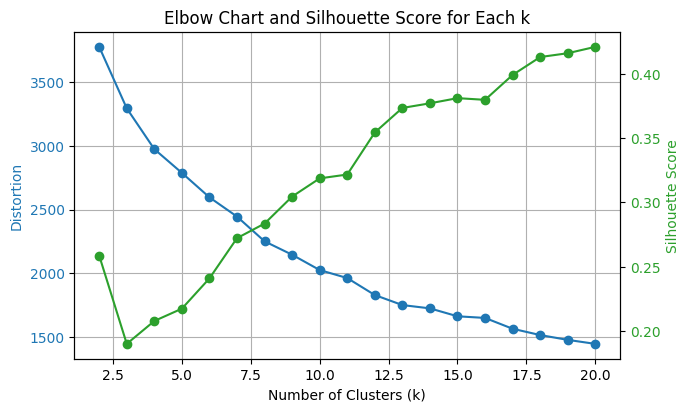

In [37]:
warnings.filterwarnings('ignore')

# Set the maximum number of clusters to consider
max_clusters = 20

# Call the function
kmeans_elbow_silhouette(X, max_clusters)


<div style="background-color:#87CEEB; padding:16px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#000080; border-radius:20px 60px;">
    <p>🔍 As mentioned in the previous section, I experimented with clustering the dataset using different top N repetitive StockCodes. Despite exploring various ranges, I found that clustering based on the top 10 StockCodes yielded the most promising results. However, upon analyzing the inertia and silhouette scores across different values of K, it became apparent that achieving a silhouette score above 0.3 would require a higher number of clusters, which may not align with the principles of effective customer segmentation in marketing.</p>



<p>📉 Taking into account both the silhouette scores and the elbow chart, I determined that selecting a smaller value for K is more suitable for our segmentation model. Therefore, I decided to proceed with K=5 for this particular dataset. It's important to note that while experimenting with different clustering approaches, I encountered challenges and did not achieve optimal results.</p>



<p>🔍 Based on my experience and analysis, I believe that this dataset may be more suitable for the RFM (Recency, Frequency, Monetary) method rather than the Bag of Products (BoP) method. The RFM method focuses on customer behavior metrics such as recency of purchase, frequency of purchase, and monetary value, which may offer deeper insights into customer segmentation and preferences for this dataset.</p>
</div>


In [38]:
# Initialize KMeans model with k=5
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)

# Fit KMeans model to the data
kmeans.fit(X)

# Assign cluster labels to each data point
cluster_labels = kmeans.predict(X)

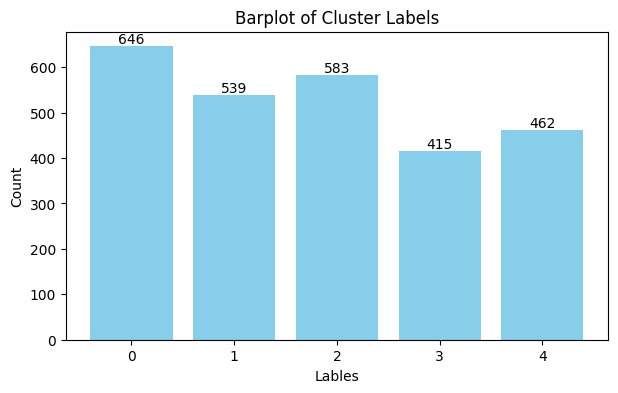

In [39]:
plot_value_counts_with_annotation(cluster_labels)

<div style="background-color:#87CEEB; padding:16px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#000080; border-radius:20px 60px;">
    <p>📊 The chart above illustrates the distribution of customers across different clusters generated by the K-means model. Impressively, the clusters appear to be relatively balanced, with each cluster containing a comparable number of customers.</p>


<p>💡 However, it's essential to note that during various experiments involving different ranges for N in the top N repetitive StockCodes, the results indicated a potential for significant imbalance in cluster counts when considering a larger number of products in the dataset.</p>



<p>🔄 This observation underscores the importance of carefully selecting the number of products included in the analysis, as it directly impacts the balance and effectiveness of the clustering outcomes.</p>
</div>


In [40]:
# Calculate Silhouette score and inertia
silhouette_score_kmeans, inertia_kmeans = calculate_silhouette_and_inertia(X, cluster_labels, kmeans)

# Print and save the results
print("Silhouette Score:", silhouette_score_kmeans)
print("Inertia:", inertia_kmeans)

Silhouette Score: 0.21741511906922398
Inertia: 2788.4259457276307


<div style="background-color:#87CEEB; padding:16px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#000080; border-radius:20px 60px;">
    <h3>Insights from Experimentation 📊 </h3>
    <p>The outcomes of various experiments conducted on this dataset, involving different ranges of N in the top N StockCode, provide valuable insights. Specifically, these experiments have led us to question the suitability of the Bag of Products (BoP) method for this dataset.</p>
    <p>By observing that clustering based on a small subset of products (only 10 out of more than 4000) can yield nearly balanced clusters, we've gained a crucial realization: the dimensionality of the BoP dataset significantly impacts clustering outcomes. This suggests that the BoP method may not be the most appropriate approach for this particular dataset.</p>
    <p>The findings underscore the importance of considering dataset dimensionality and the potential challenges posed by high-dimensional datasets in clustering analysis. Moving forward, we may need to explore alternative methodologies or refine our approach to effectively address the complexities of this dataset. 📈🔍</p>
</div>


<a id='8'></a>
# <span style="color: #3EB489; border-bottom: 6px solid  #20603D; font-family:'Bahnschrift Condensed'; background-color: #fadb8c;"> DBSCAN🛒</span>
⬆️ [Tabel of Contents](#contents_tabel)

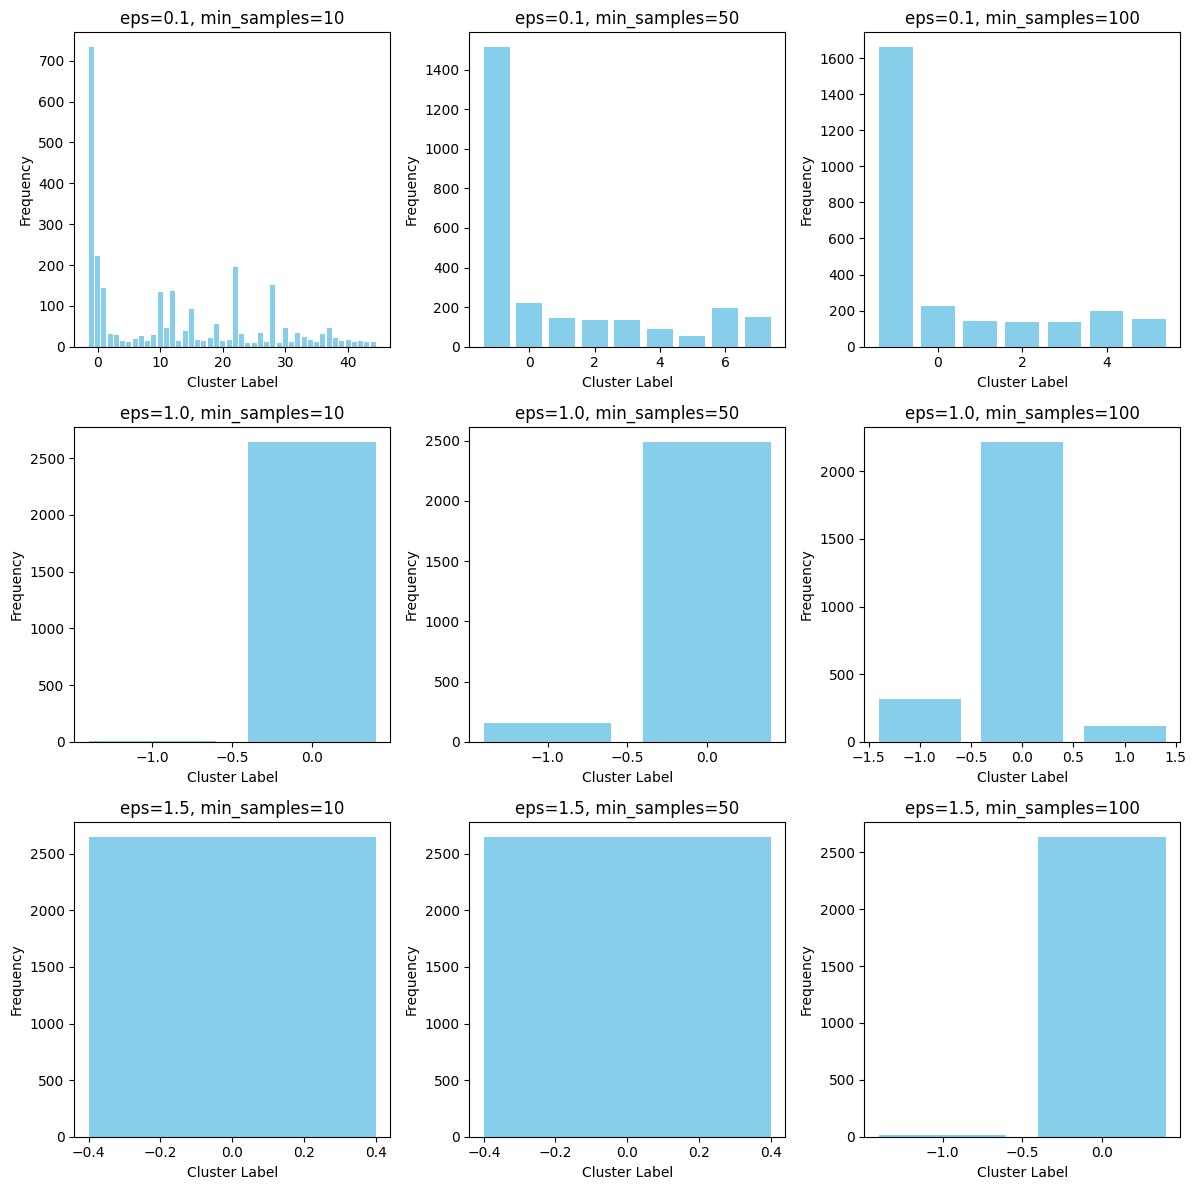

In [41]:
# Define the specified hyperparameters for DBSCAN
eps_values = [0.1, 1.0, 1.5]
min_samples_values = [10, 50, 100]

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Iterate over each combination of eps and min_samples values
for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        # Fit DBSCAN clustering
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)

        # Count unique labels and their frequencies
        unique_labels, label_counts = np.unique(labels, return_counts=True)

        # Plot bar plot
        ax = axes[i, j]
        ax.bar(unique_labels, label_counts, color='skyblue')
        ax.set_title(f'eps={eps}, min_samples={min_samples}')
        ax.set_xlabel('Cluster Label')
        ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


<div style="background-color:#87CEEB; padding:16px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#000080; border-radius:20px 60px;">
    <h3>Evaluation of DBSCAN Model🔍 </h3>
    <p>In this section, I conducted an evaluation of the DBSCAN model on the dataset. By plotting the count of each cluster across different values of <strong>epsilon and min-sample</strong> (hyperparameters of DBSCAN), we gained valuable insights into the clustering performance.</p>
    <p>Observing the results, it's evident that using lower values of epsilon leads to a significant portion of instances (customers) being classified as <strong>outliers</strong>. Furthermore, when employing lower values of epsilon and adjusting the min-sample to 100, the DBSCAN model yields 6 clusters with a limited number of samples. However, increasing epsilon to 1 or 1.5 results in the majority of instances being clustered into a single class, indicating poor clustering performance.</p>
    <p>This observation underscores the importance of selecting appropriate hyperparameters to achieve meaningful clustering results. In customer segmentation, <em>our goal is to distribute instances across an appropriate number of classes rather than clustering the majority into a single class.</em></p>
    <p>Based on the outcomes of the DBSCAN model and various experiments conducted with different ranges for N in the top N repetitive StockCode, <strong>we can confidently conclude that the DBSCAN results align with our initial hypothesis regarding the limitations of the Bag of Products (BoP) method for this dataset.</strong> Therefore, it appears that utilizing the RFM method for clustering this dataset may yield more satisfactory results. 🛠️📊</p>
</div>

In [42]:
# Initialize DBSCAN model with best parameters
dbscan = DBSCAN(eps=0.1, min_samples=100)

# Fit DBSCAN model to the data and predict cluster labels
dbscan_labels = dbscan.fit_predict(X)

In [43]:
# Calculate Silhouette score
silhouette_score_dbscan = silhouette_score(X, dbscan_labels)

# Print and save the results
print("Silhouette Score by Considering Outliers:", silhouette_score_dbscan)

# Filter out outliers (points with label -1)
non_outlier_mask = (dbscan_labels != -1)
non_outlier_data = X[non_outlier_mask]
non_outlier_labels = dbscan_labels[non_outlier_mask]

# Compute silhouette score for non-outlier points
silhouette_score_dbscan = silhouette_score(non_outlier_data, non_outlier_labels)
print("Silhouette Score without Outliers:", silhouette_score_dbscan)

Silhouette Score by Considering Outliers: 0.20677139498012626
Silhouette Score without Outliers: 1.0


<a id='9'></a>
# <span style="color: #3EB489; border-bottom: 6px solid  #20603D; font-family:'Bahnschrift Condensed'; background-color: #fadb8c;"> Modeling⚡</span>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="background-color:#87CEEB; padding:16px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#000080; border-radius:20px 60px;">
    <h3>Model Fitting and Evaluation🔍 </h3>
    <p>In this section, I present code snippets to fit the <strong>KNN, SVM, and XGB models</strong> on the Bag of Products (BoP) dataset, using the labels obtained from the <strong>K-means</strong> clustering model. The objective is to evaluate the performance of these models in customer segmentation. Each model is trained using the training data obtained from the BoP dataset, and then evaluated on the test data to assess its effectiveness.</p>
    <p>These snippets demonstrate the process of tuning each model's hyperparameters using <strong>GridSearchCV</strong>, optimizing their performance. After fitting the models, they are evaluated on the test data to determine their effectiveness in customer segmentation. Let's proceed with analyzing the results to select the best-performing model for our dataset. 📊✨</p>
</div>


In [44]:
# Step 1: Determine y from cluster_labels
y = cluster_labels

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

'''
# Step 3: Resample data using SMOTE Tomek
smote_tomek = SMOTETomek(random_state=42)
X_train, y_train = smote_tomek.fit_resample(X_train, y_train)
'''

'\n# Step 3: Resample data using SMOTE Tomek\nsmote_tomek = SMOTETomek(random_state=42)\nX_train, y_train = smote_tomek.fit_resample(X_train, y_train)\n'

In [45]:
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1_micro = f1_score(y_test, y_predicted, average='weighted')
    f1_macro = f1_score(y_test, y_predicted, average='macro')
    return accuracy, precision, recall, f1_micro, f1_macro

<a id='10'></a>
# <span style="color: #3EB489; border-bottom: 6px solid  #20603D; font-family:'Bahnschrift Condensed'; background-color: #fadb8c;"> K-Nearest Neighbors🎯</span>
⬆️ [Tabel of Contents](#contents_tabel)

In [46]:
# Define KNN classifier
knn = KNeighborsClassifier()

# Define hyperparameters to search
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}

# Perform grid search
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=3, scoring='f1_macro', n_jobs=-1, verbose=1)
grid_search_knn.fit(X_train, y_train)

# Get the best parameters
best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_

print(f"Best parameters in KNN: {best_params_knn}")
print(f"Best cross-validation score (F1-macro) in KNN: {best_score_knn}")

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best parameters in KNN: {'algorithm': 'brute', 'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Best cross-validation score (F1-macro) in KNN: 0.993903496276643


In [47]:
# Train the model with the best parameters
best_knn = grid_search_knn.best_estimator_
best_knn.fit(X_train, y_train)


# Evaluate the model
train_score_knn = round(best_knn.score(X_train, y_train), 3)
print("Training Accuracy: ", train_score_knn)
test_score_knn = round(best_knn.score(X_test, y_test), 3)
print("Test Accuracy: ", test_score_knn)
print('===========================================================')

# Predict phase
y_pred = best_knn.predict(X_test)
print("\nClassification Report:\n")
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)
print('===========================================================')

# F1-score
accuracy_KNN, precision_KNN, recall_KNN, f1_micro_KNN, f1_macro_KNN = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1_micro = %.3f \nf1_macro = %.3f" %
 (accuracy_KNN, precision_KNN, recall_KNN, f1_micro_KNN, f1_macro_KNN))

Training Accuracy:  1.0
Test Accuracy:  0.994

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       122
           1       0.99      1.00      1.00       107
           2       0.98      1.00      0.99       123
           3       1.00      0.99      0.99        86
           4       1.00      1.00      1.00        91

    accuracy                           0.99       529
   macro avg       0.99      0.99      0.99       529
weighted avg       0.99      0.99      0.99       529

accuracy = 0.994 
precision = 0.994 
recall = 0.994 
f1_micro = 0.994 
f1_macro = 0.995


<a id='11'></a>
# <span style="color: #3EB489; border-bottom: 6px solid  #20603D; font-family:'Bahnschrift Condensed'; background-color: #fadb8c;"> Support Vector Machine🎯</span>
⬆️ [Tabel of Contents](#contents_tabel)

In [48]:
# Define SVM classifier
svm = SVC()

# Define hyperparameters to search
param_grid_svm = {
    'C': [0.01, 0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Perform grid search
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=3, scoring='f1_macro', n_jobs=-1, verbose=1)
grid_search_svm.fit(X_train, y_train)

# Get the best parameters
best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_

print(f"Best parameters in SVM: {best_params_svm}")
print(f"Best cross-validation score (F1-macro) in SVM: {best_score_svm}")

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters in SVM: {'C': 0.1, 'kernel': 'poly'}
Best cross-validation score (F1-macro) in SVM: 0.9969156735445402


In [49]:
# Train the model with the best parameters
best_svm = grid_search_svm.best_estimator_
best_svm.fit(X_train, y_train)


# Evaluate the model
train_score_svm = round(best_svm.score(X_train, y_train), 3)
print("Training Accuracy: ", train_score_svm)
test_score_svm = round(best_svm.score(X_test, y_test), 3)
print("Test Accuracy: ", test_score_svm)
print('===========================================================')

# Predict phase
y_pred = best_svm.predict(X_test)
print("\nClassification Report:\n")
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)
print('===========================================================')

# F1-score
accuracy_SVM, precision_SVM, recall_SVM, f1_micro_SVM, f1_macro_SVM = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1_micro = %.3f \nf1_macro = %.3f" %
 (accuracy_SVM, precision_SVM, recall_SVM, f1_micro_SVM, f1_macro_SVM))

Training Accuracy:  0.997
Test Accuracy:  0.992

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       122
           1       1.00      1.00      1.00       107
           2       0.98      0.98      0.98       123
           3       1.00      1.00      1.00        86
           4       1.00      1.00      1.00        91

    accuracy                           0.99       529
   macro avg       0.99      0.99      0.99       529
weighted avg       0.99      0.99      0.99       529

accuracy = 0.992 
precision = 0.992 
recall = 0.992 
f1_micro = 0.992 
f1_macro = 0.993


<a id='12'></a>
# <span style="color: #3EB489; border-bottom: 6px solid  #20603D; font-family:'Bahnschrift Condensed'; background-color: #fadb8c;"> XGBoost🎯</span>
⬆️ [Tabel of Contents](#contents_tabel)

In [50]:
# Define XGB classifier
xgb = XGBClassifier()

# Define hyperparameters to search
param_grid_xgb = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300]
}

# Perform grid search
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=3, scoring='f1_macro', n_jobs=-1, verbose=1)
grid_search_xgb.fit(X_train, y_train)

# Get the best parameters
best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = grid_search_xgb.best_score_

print(f"Best parameters in XGB: {best_params_xgb}")
print(f"Best cross-validation score (F1-macro) in XGB: {best_score_xgb}")

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters in XGB: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best cross-validation score (F1-macro) in XGB: 0.998139878921109


In [51]:
# Train the model with the best parameters
best_xgb = grid_search_xgb.best_estimator_
best_xgb.fit(X_train, y_train)


# Evaluate the model
train_score_xgb = round(best_xgb.score(X_train, y_train), 3)
print("Training Accuracy: ", train_score_xgb)
test_score_xgb = round(best_xgb.score(X_test, y_test), 3)
print("Test Accuracy: ", test_score_xgb)
print('===========================================================')

# Predict phase
y_pred = best_xgb.predict(X_test)
print("\nClassification Report:\n")
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)
print('===========================================================')

# F1-score
accuracy_XGB, precision_XGB, recall_XGB, f1_micro_XGB, f1_macro_XGB = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1_micro = %.3f \nf1_macro = %.3f" %
 (accuracy_XGB, precision_XGB, recall_XGB, f1_micro_XGB, f1_macro_XGB))

Training Accuracy:  1.0
Test Accuracy:  0.992

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       122
           1       1.00      1.00      1.00       107
           2       0.98      0.98      0.98       123
           3       1.00      1.00      1.00        86
           4       1.00      1.00      1.00        91

    accuracy                           0.99       529
   macro avg       0.99      0.99      0.99       529
weighted avg       0.99      0.99      0.99       529

accuracy = 0.992 
precision = 0.992 
recall = 0.992 
f1_micro = 0.992 
f1_macro = 0.993


<a id='13'></a>
# <span style="color: #3EB489; border-bottom: 6px solid  #20603D; font-family:'Bahnschrift Condensed'; background-color: #fadb8c;"> Models Comparision🚀</span>
⬆️ [Tabel of Contents](#contents_tabel)

In [52]:
Conclusion = pd.DataFrame({'Models':['K-Nearest Neighbors', 'Support Vector Machine', 'XGBoost'],
                          'train_acc':
                           [train_score_knn, train_score_svm, train_score_xgb],
                          'test_acc':
                           [accuracy_KNN, accuracy_SVM,  accuracy_XGB],
                          'f1-micro':
                           [f1_micro_KNN, f1_micro_SVM,  f1_micro_XGB],
                          'f1-macro':
                           [f1_macro_KNN, f1_macro_SVM,  f1_macro_XGB]}).round(3)
Conclusion

,Models,train_acc,test_acc,f1-micro,f1-macro
0,K-Nearest Neighbors,1.000,0.994,0.994,0.995
1,Support Vector Machine,0.997,0.992,0.992,0.993
2,XGBoost,1.000,0.992,0.992,0.993


<div style="background-color:#87CEEB; padding:16px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#000080; border-radius:20px 60px;">
    <h3>Model Comparison and Selection</h3>
    <p>📊 Upon analyzing the model comparison data frame, it's evident that the <strong>KNN</strong> model outperforms the SVM and XGB models. This superiority may be attributed to the similarity between the KNN model and the K-means clustering approach, as we utilized <strong>K-means labels</strong> as <strong>y</strong> during model training.</p>
    <p>The KNN model's efficacy in customer segmentation aligns well with the principles of K-means clustering, making it a suitable choice for our dataset. 🛠️🔍</p>
</div>


<a id='14'></a>
# <span style="color: #3EB489; border-bottom: 6px solid  #20603D; font-family:'Bahnschrift Condensed'; background-color: #fadb8c;"> Prediction📊</span>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="background-color:#87CEEB; padding:16px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#000080; border-radius:20px 60px;">
    <h3>Testing Model with Random Customer Data🔢 </h3>
    <p>In this section, we generate simulated data for 20 random customers, each exhibiting randomized behavior in purchasing StockCodes. The objective is to test the effectiveness of our clustering model by predicting the cluster to which each random customer should belong.</p>
</div>

In [55]:
# the top 10 StockCodes
top_stockcodes
np.random.seed(42)

# Create a random dataset with 20 rows and 10 columns
# Define the probabilities
probabilities = [0.75, 0.25]  # 75% chance of 0, 25% chance of 1

# Generate random data based on probabilities
random_data = np.random.choice([0, 1], size=(20, 10), p=probabilities)
# random_data = np.random.randint(2, size=(10, 10))


# Create a DataFrame from the random dataset with StockCode names as columns
new_customer_data = pd.DataFrame(random_data, columns=top_stockcodes)


# Create X_test_new from the new_customer dataset
X_test_new = new_customer_data.values

# Use the best KNN model to predict cluster labels
cluster_labels_new = best_svm.predict(X_test_new)

# Add the predicted cluster labels to the DataFrame
new_customer_data['cluster_label'] = cluster_labels_new

# Display the DataFrame with predicted cluster labels
print("\nDataFrame with Predicted Cluster Labels:")
new_customer_data



DataFrame with Predicted Cluster Labels:


StockCode,85123A,22423,85099B,47566,20725,84879,22720,POST,20727,22383,cluster_label
0,0,1,0,0,0,0,0,1,0,0,0
1,0,1,1,0,0,0,0,0,0,0,3
2,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,1,1,1,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,2
5,1,1,1,1,0,1,0,0,0,0,3
6,0,0,1,0,0,0,0,1,0,1,0
7,1,0,0,1,0,0,1,0,0,0,2
8,1,0,0,0,0,0,0,0,1,0,4
9,0,0,1,0,1,0,0,0,0,0,0


<div style="background-color:#87CEEB; padding:16px; border-style: solid; font-family:'Comic Sans MS', cursive; color:#000080; border-radius:20px 60px;">
    <p><strong>Using the fitted KNN model</strong>, we predict the cluster labels for the simulated customer data. Each customer's behavior in purchasing StockCodes is randomized to simulate real-world scenarios. By assigning cluster labels to the random customer data, we can assess how well our model generalizes to unseen data and accurately segments customers based on their purchasing behavior. 🎲🛒</p>
</div>


# <span style="color: #dc322f; border-bottom: 6px solid  #20603D; font-family:'Bahnschrift Condensed'; font-size:140%; background-color: #fadb8c;"> Thanks for Your Attention</span>